In [2]:
## Import Statements
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

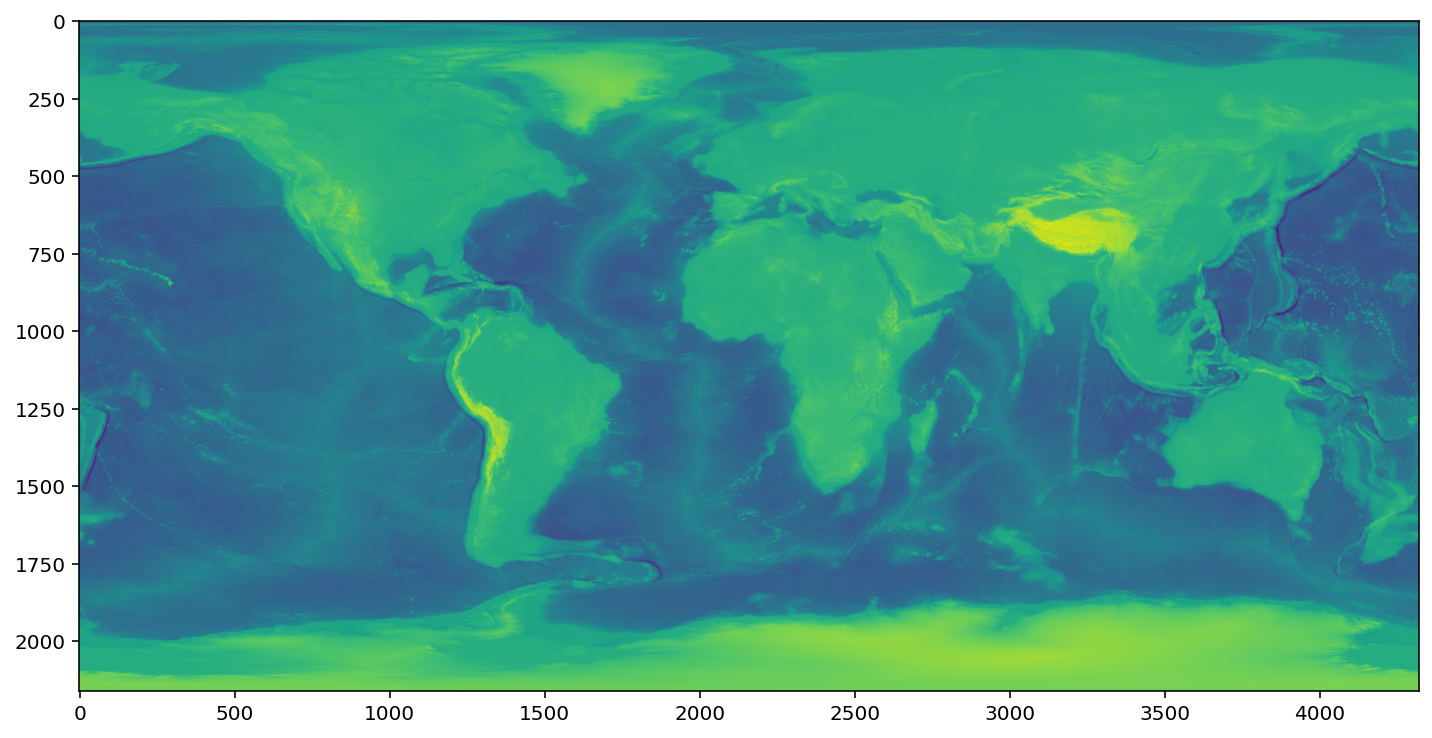

In [3]:
## Reading the files & displaying using just external library functions

# Some configuration on what we are loading
minutes = 5
dataset = 'TBI' # Bedrock/Elevation

# Load the Data
data_file = open('data/{}_world_{}min.npz'.format(dataset, minutes), 'rb')
data_2d = np.load(data_file)['data_matrix']
data_file.close()

# Render the Image, note can be slow on large files
plt.figure(figsize=(12,8))
plt.imshow(data_2d)
plt.show()

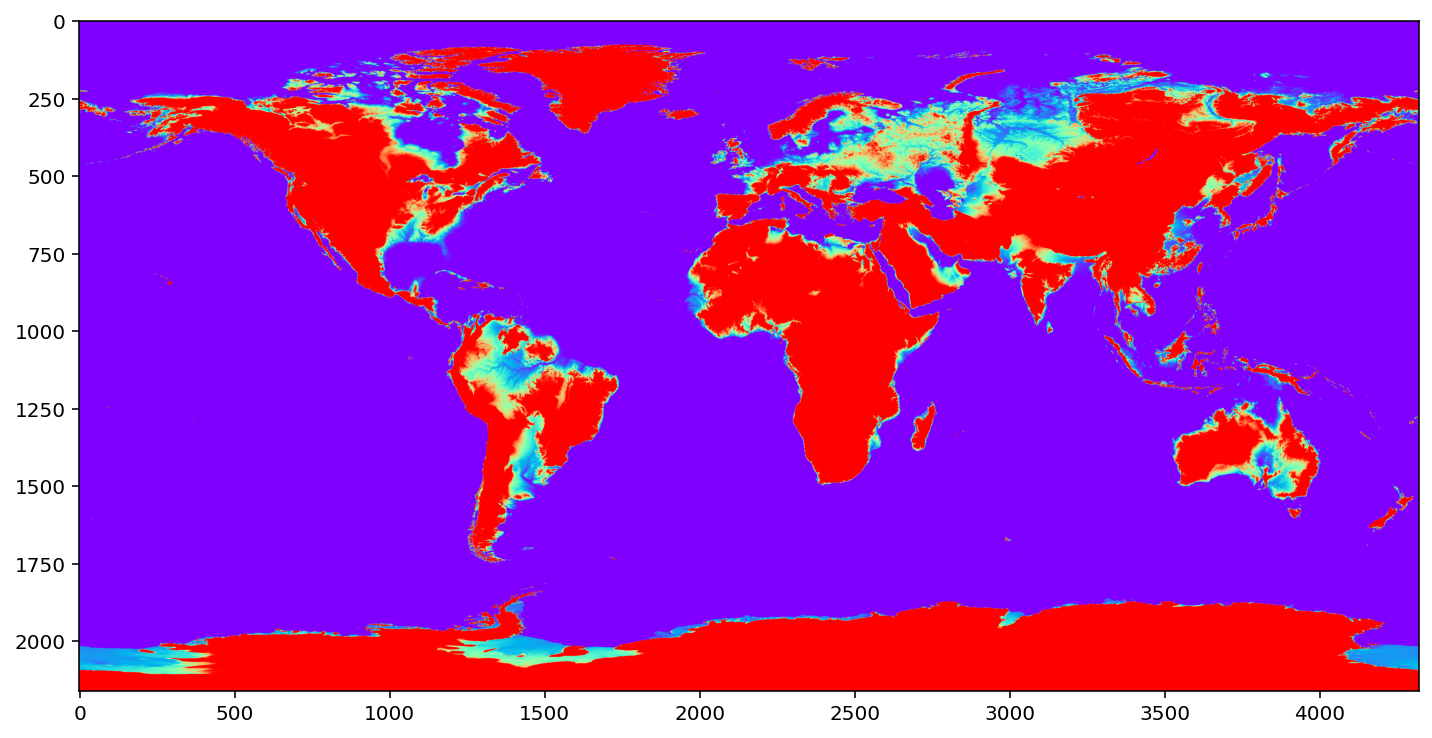

In [6]:
## Importing some custom files made long ago to display the data
from src import image

# Set the image info
imageinfo = {
    'resolution': str(minutes) + 'min',
    'dataset': dataset.lower(),
    'folder': 'img/01/'
}
[imageinfo['n_rows'], imageinfo['n_cols']] = data_2d.shape

# Display the image & save the image.
image.RasterImage(imageinfo, region='world') \
    .addLayer('elevation', data_2d.flatten(), colormap='rainbow') \
    .display().save().final()


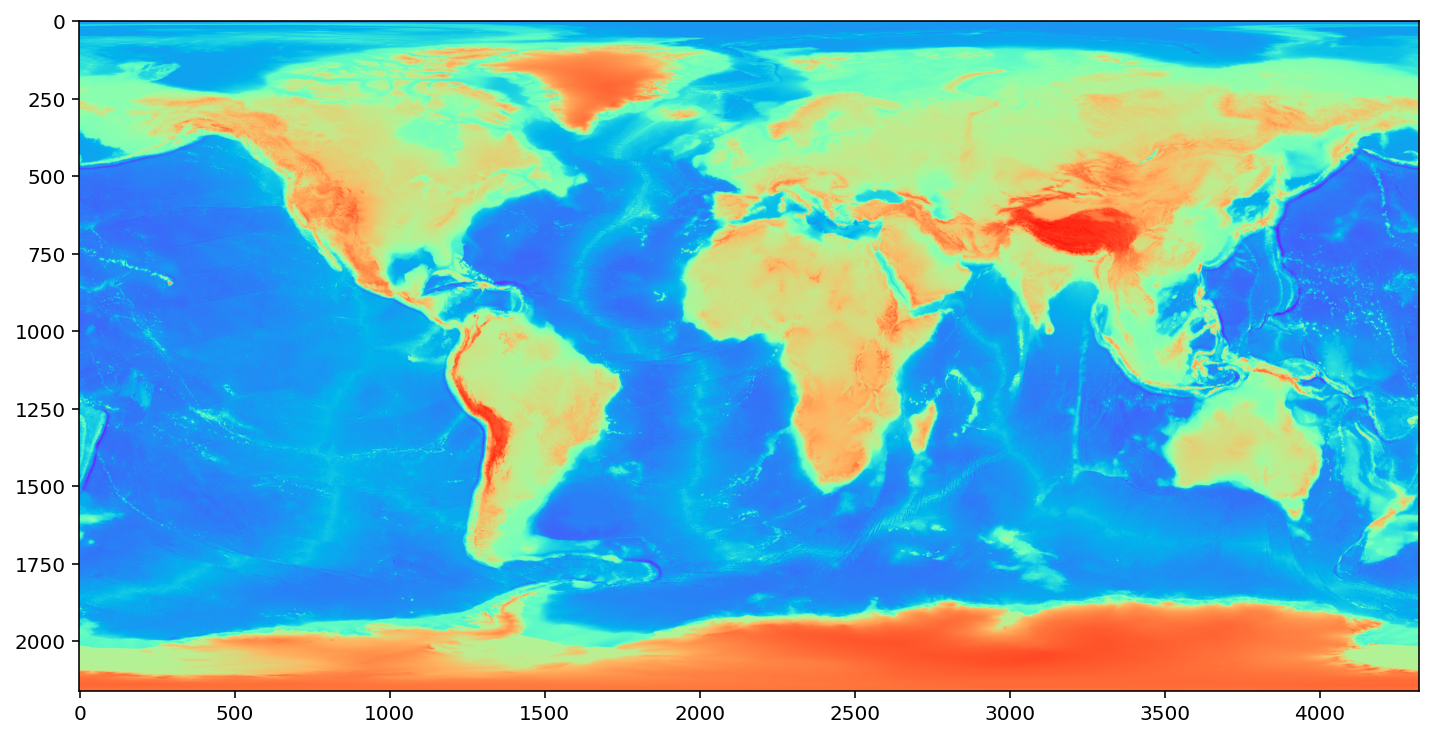

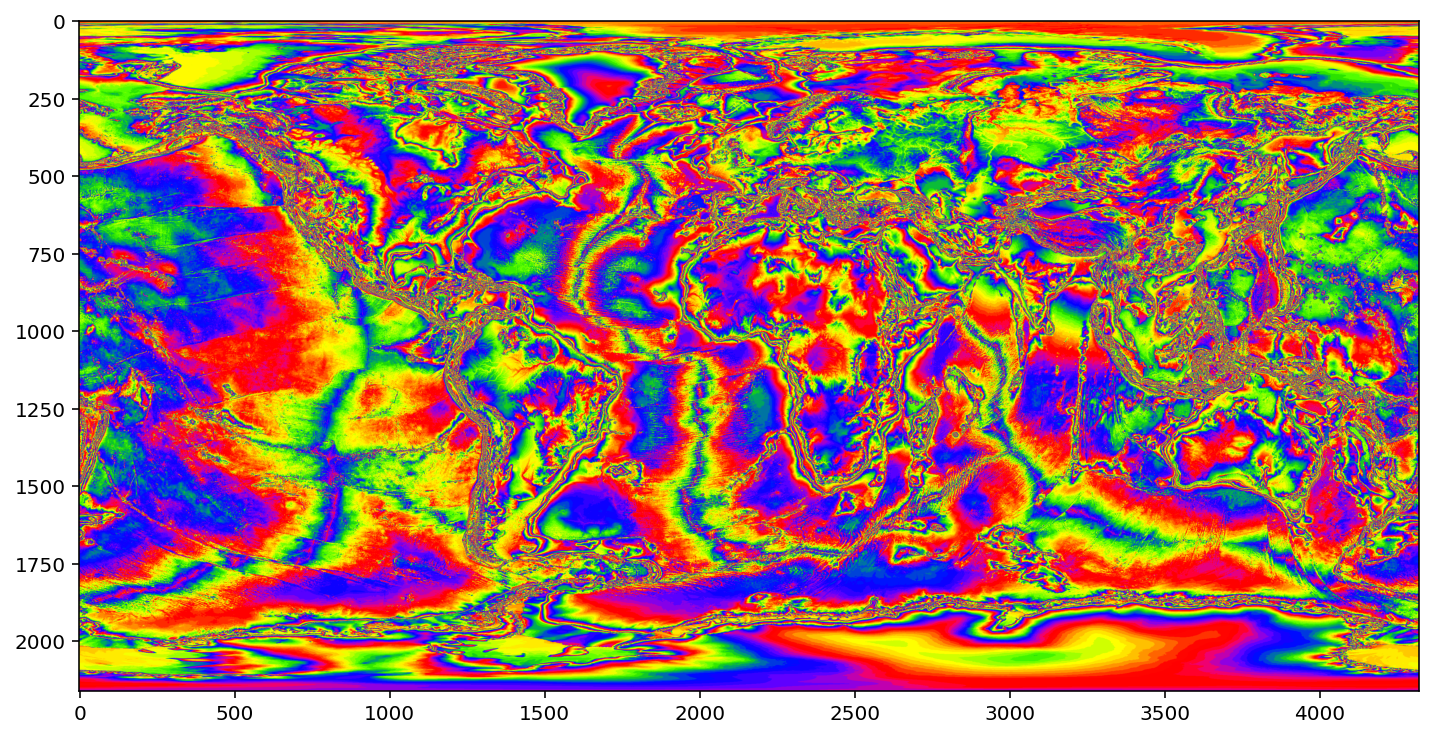

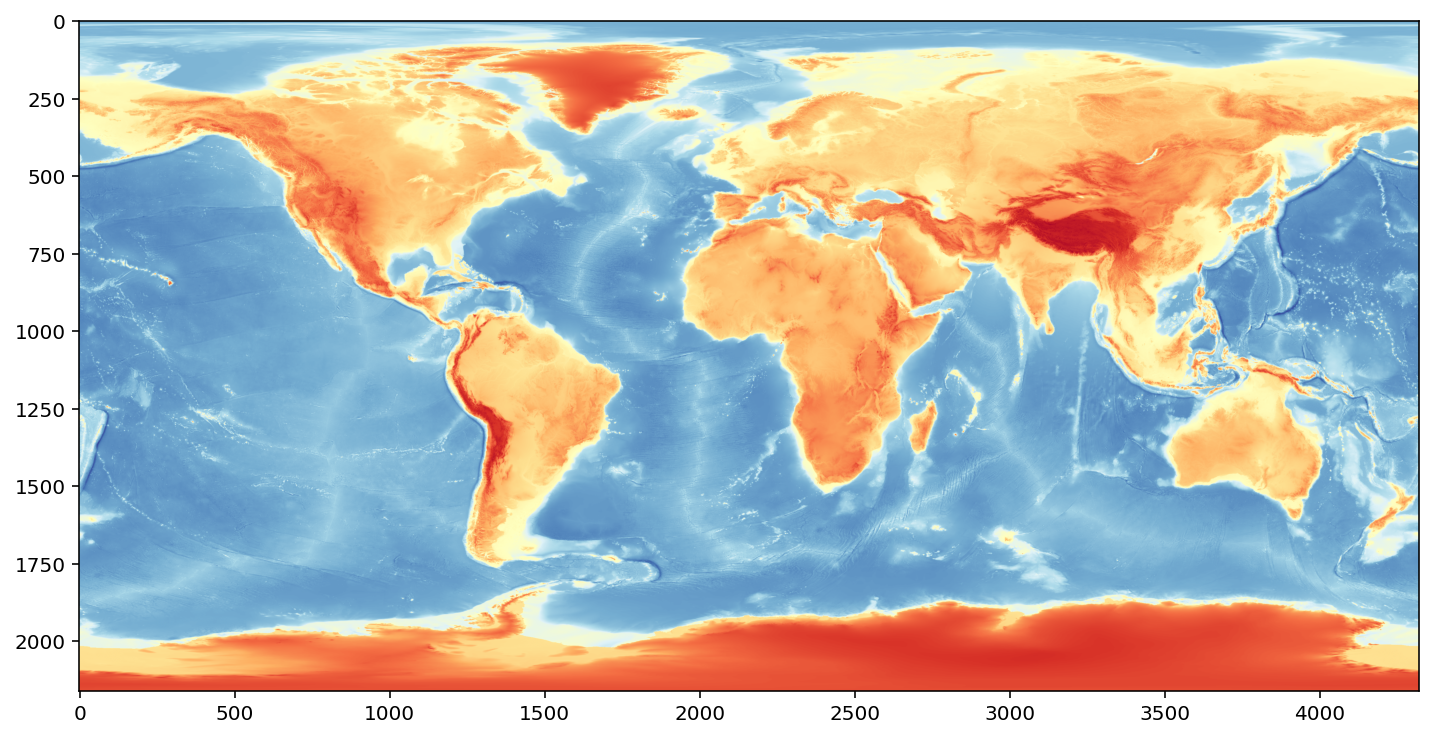

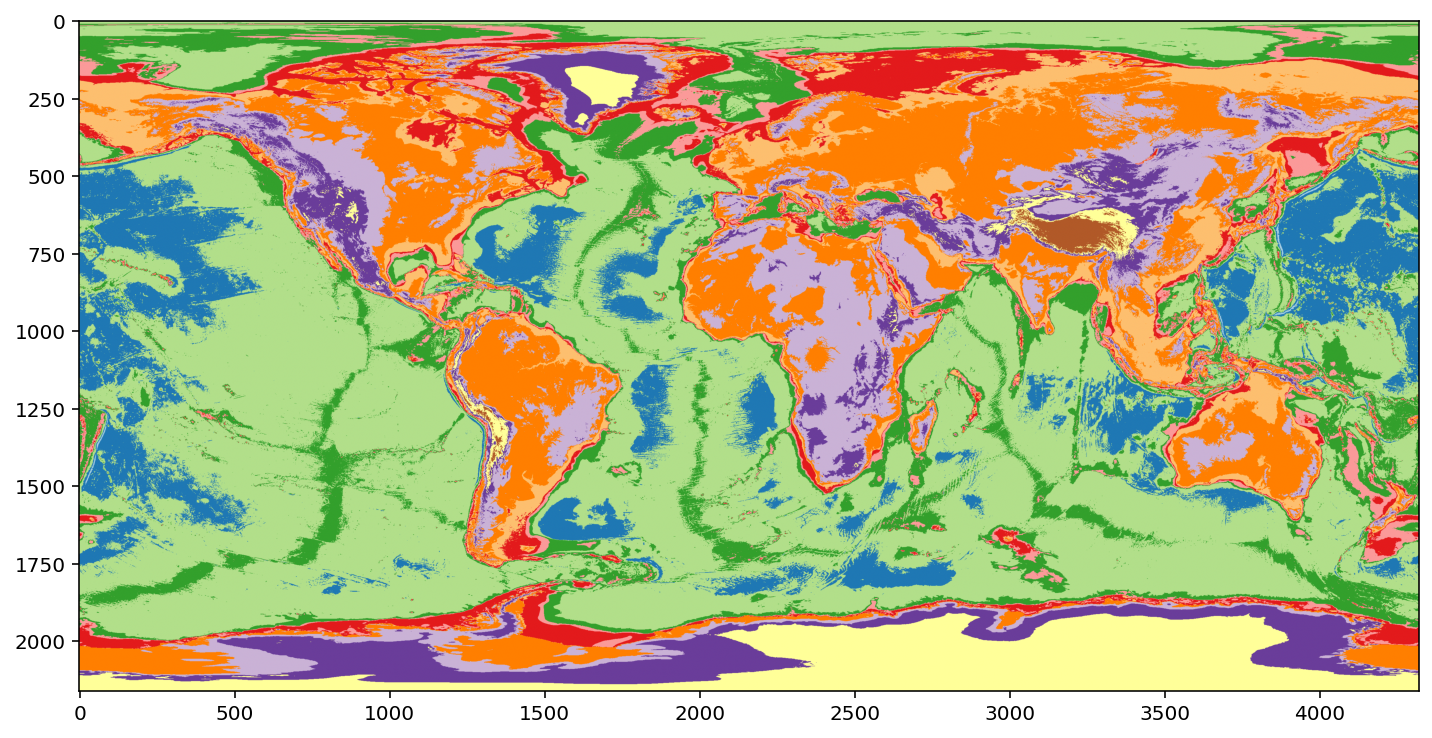

In [15]:
# More examples of the images, different colormaps
data_sqrt_1d = np.power(np.abs(data_2d.flatten() * 1.0), 0.5) * np.sign(data_2d.flatten())
data_sqrt_1d = data_sqrt_1d / max(data_sqrt_1d)

image.RasterImage(imageinfo, region='world') \
    .addLayer('elevation', data_sqrt_1d, colormap='rainbow', transforms=['norm']) \
    .display().final()
image.RasterImage(imageinfo, region='world') \
    .addLayer('elevation', data_sqrt_1d, colormap='prism', transforms=['norm']) \
    .display().final()
image.RasterImage(imageinfo, region='world') \
    .addLayer('elevation', -data_sqrt_1d, colormap='diverge', transforms=['norm']) \
    .display().final()
image.RasterImage(imageinfo, region='world') \
    .addLayer('elevation', data_sqrt_1d, colormap='qual', transforms=['norm']) \
    .display().final()